In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt


In [70]:
df = pd.read_csv(r'/content/hypertension_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [71]:
df.isna().sum().sum()

25

In [72]:
df.sex = df.sex.fillna(df.sex).mean()

In [73]:
x = df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,0.5,3,145,233,1,0,150,0,2.3,0,0,1
1,64.0,0.5,2,130,250,0,1,187,0,3.5,0,0,2
2,52.0,0.5,1,130,204,0,0,172,0,1.4,2,0,2
3,56.0,0.5,1,120,236,0,1,178,0,0.8,2,0,2
4,66.0,0.5,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.5,0,138,294,1,1,106,0,1.9,1,3,2
26079,60.0,0.5,0,144,200,0,0,126,1,0.9,1,0,3
26080,68.0,0.5,0,100,234,0,1,156,0,0.1,2,1,3
26081,67.0,0.5,1,154,232,0,0,164,0,0.0,2,1,2


In [74]:
y = df.iloc[:,-1]
y

0        1
1        1
2        1
3        1
4        1
        ..
26078    0
26079    0
26080    0
26081    0
26082    0
Name: target, Length: 26083, dtype: int64

In [75]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [76]:
x_train,x_test,y_train,y_test

(        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 1723   52.0  0.5   0       140   311    0        1      120      1      1.8   
 13993  39.0  0.5   0       138   183    0        1      182      0      1.4   
 8855   43.0  0.5   0       120   249    0        0      144      0      0.8   
 18955  53.0  0.5   0       130   322    0        0      109      0      2.4   
 5151   58.0  0.5   0       145   282    0        0      142      1      2.8   
 ...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 20294  76.0  0.5   2       140   185    0        0      155      0      3.0   
 10114  50.0  0.5   0       130   264    0        0      143      0      0.4   
 1228   72.0  0.5   2       140   321    0        0      182      0      0.0   
 15950  35.0  0.5   0       120   169    0        1      144      1      2.8   
 20384  67.0  0.5   0       102   265    0        0      122      0      0.6   
 
        slope  ca  thal  
 1723       

In [78]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
model.predict(x_test).tolist()

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [80]:
ypred = model.predict(x_test)
ypred

array([0, 1, 1, ..., 1, 1, 0])

In [81]:
accuracy_score(y_test, ypred)

0.8441633122484187

In [90]:
confusion_matrix_d = confusion_matrix(y_test, ypred)

confusion_matrix_d

array([[1810,  541],
       [ 272, 2594]])

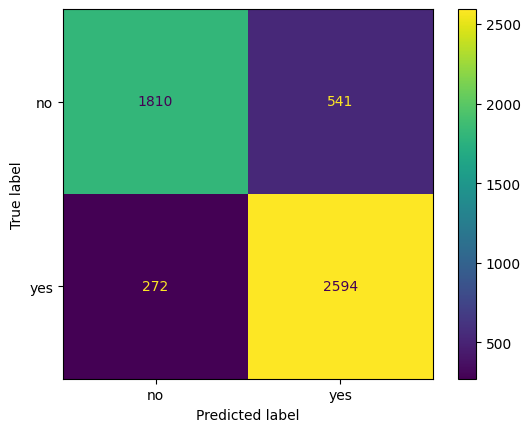

In [91]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_d, display_labels = ['no', 'yes'])
cm_display.plot()
plt.show()

In [93]:
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)

In [94]:
precision

0.8274322169059011

In [95]:
recall

0.9050942079553385

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


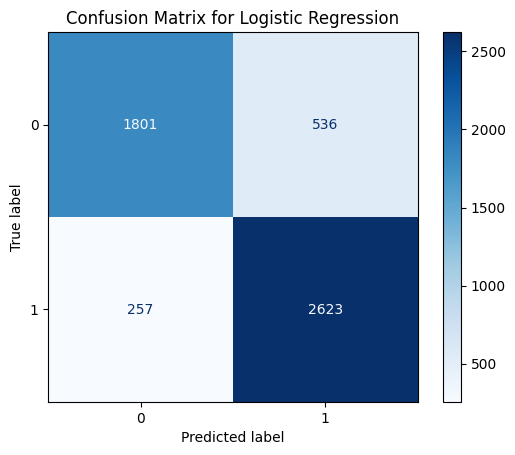

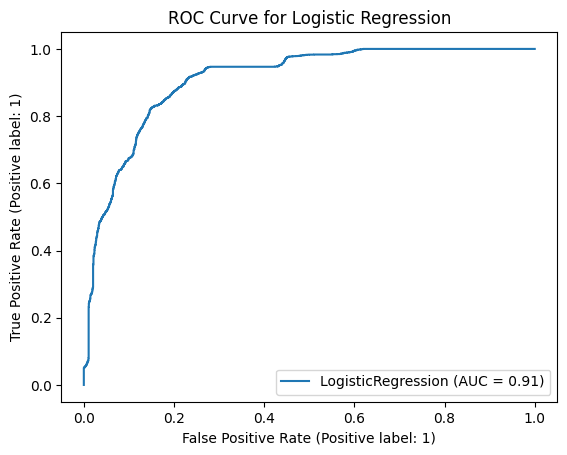

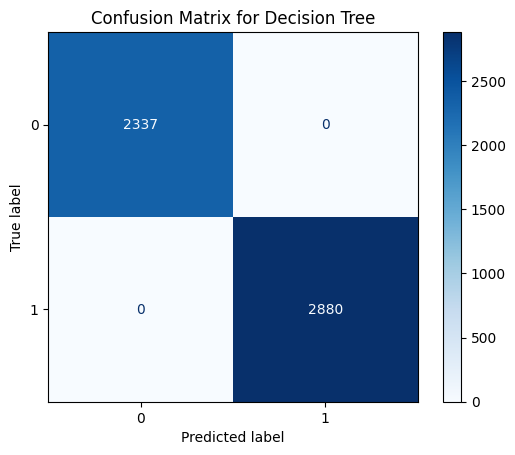

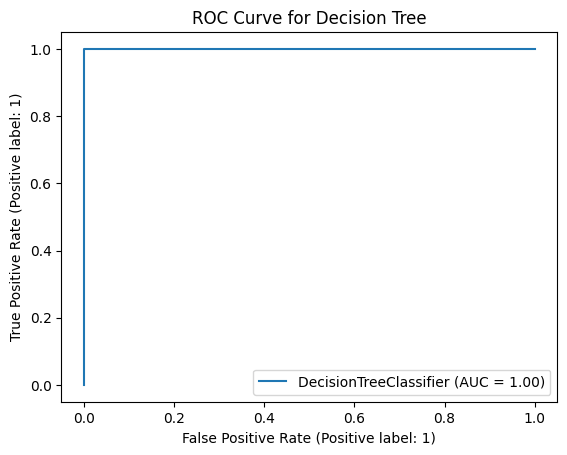

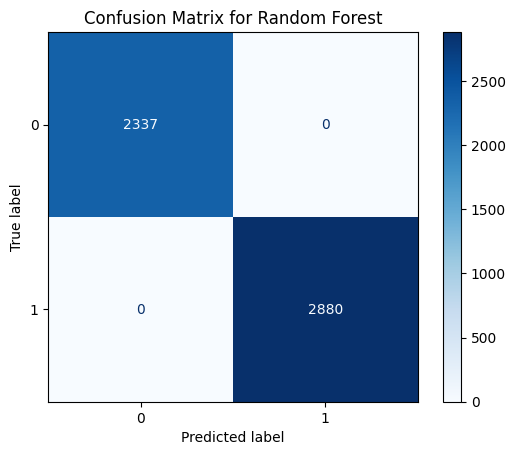

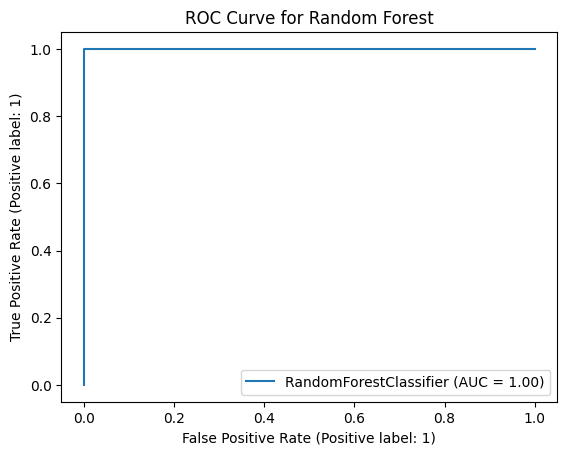

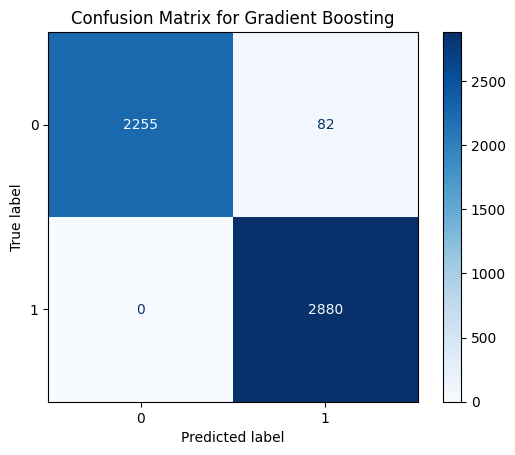

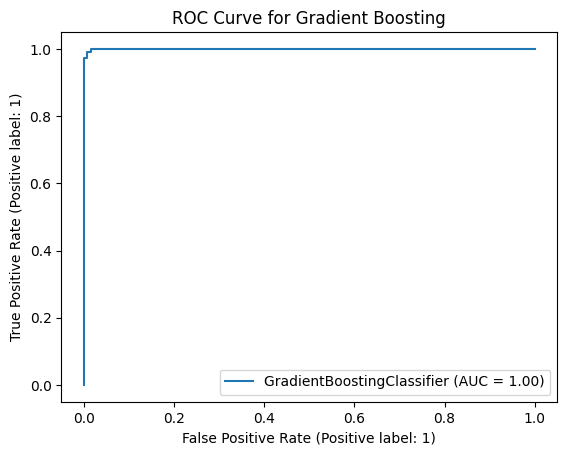

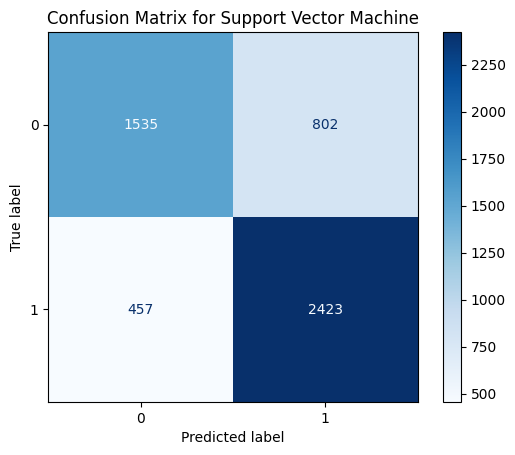

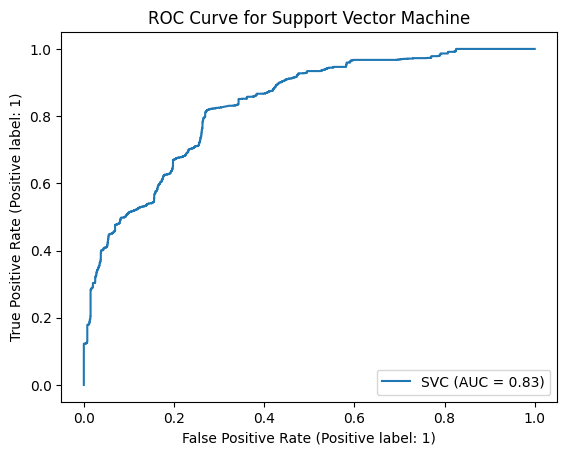

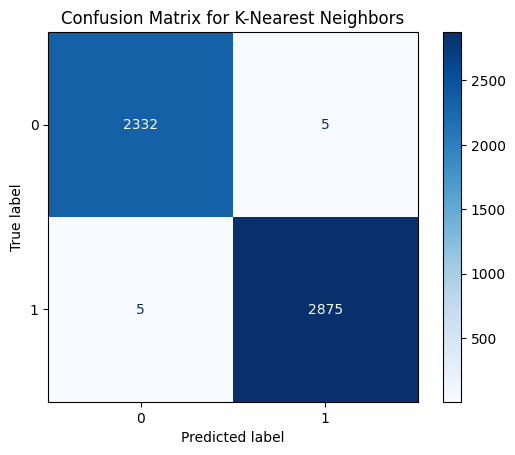

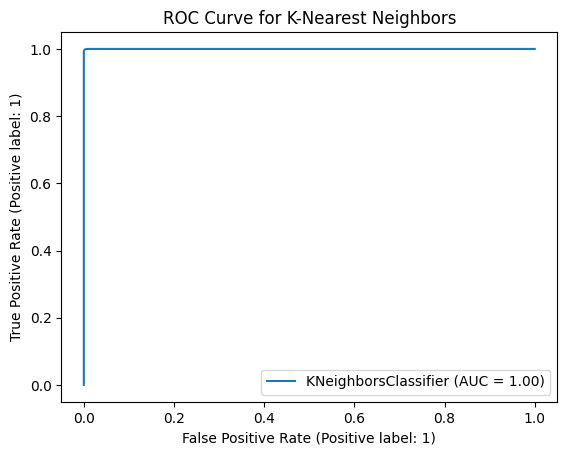

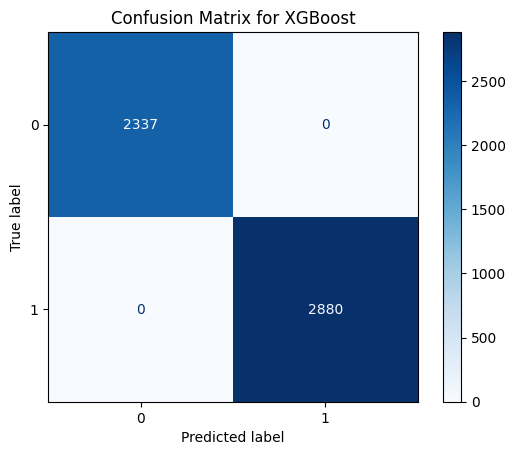

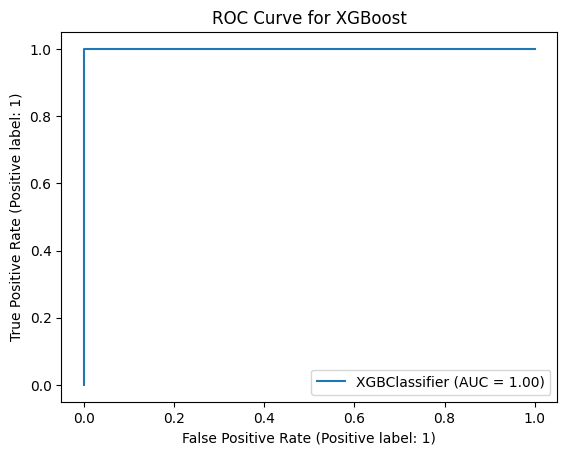

[LightGBM] [Info] Number of positive: 11394, number of negative: 9472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 20866, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546056 -> initscore=0.184747
[LightGBM] [Info] Start training from score 0.184747


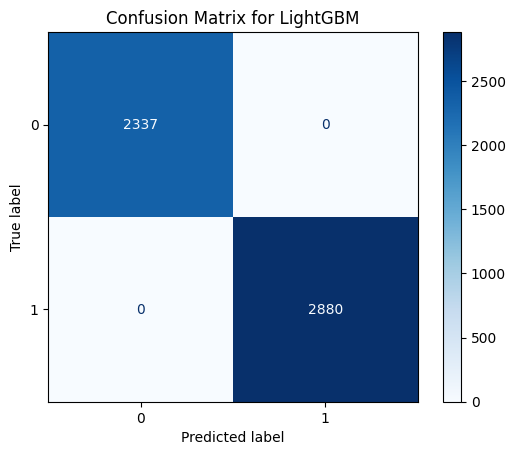

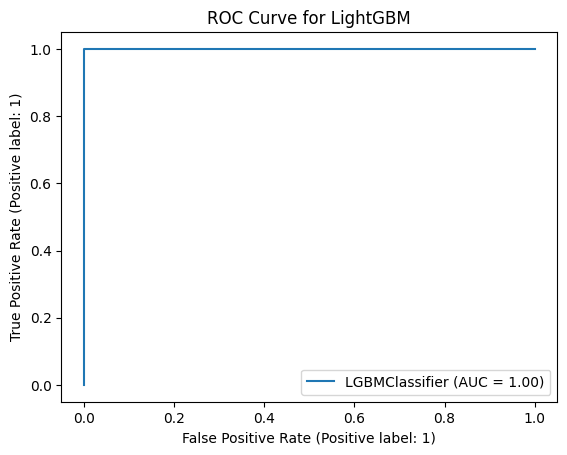

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt


# Splitting
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Defining models
models = [
    ('Logistic Regression', LogisticRegression( random_state = 42)),
    ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
    ('Random Forest', RandomForestClassifier(random_state = 42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)),
    ('XGBoost', XGBClassifier(random_state = 42)),
    ('LightGBM', LGBMClassifier(random_state = 42)),
    # ('CatBoost', CatBoostClassifier(silent=True))
]

# Initializing an empty list
results_list = []

# Evaluation
for name, model in models:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    y_pred_proba = model.predict_proba(xtest)[:, 1]

    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    balanced_acc = balanced_accuracy_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred_proba)
    conf_matrix = confusion_matrix(ytest, y_pred)

    results_list.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Balanced Accuracy': balanced_acc, 'ROC-AUC': roc_auc})

    # Displaying the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Displaying the ROC curve using RocCurveDisplay
    RocCurveDisplay.from_estimator(model, xtest, ytest)
    plt.title(f'ROC Curve for {name}')
    plt.show()

results = pd.DataFrame(results_list)

In [99]:
results

,Model,Accuracy,Precision,Recall,Balanced Accuracy,ROC-AUC
0,Logistic Regression,0.847997,0.830326,0.910764,0.840705,0.909014
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting,0.984282,0.972316,1.000000,0.982456,0.999746
4,Support Vector Machine,0.758674,0.751318,0.841319,0.749072,0.832598
5,K-Nearest Neighbors,0.998083,0.998264,0.998264,0.998062,0.999988
6,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
7,LightGBM,1.000000,1.000000,1.000000,1.000000,1.000000
